Applying PCA on German Credit Dataset 

entire_dataset = pd.merge(X_test, predictions_col, left_index = True, right_index = True)

In [59]:
# Loading the libraries
from util import *
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

In [60]:
raw_data = pd.read_csv(r'..\Preprocessed_datasets\preprocessed_german_credit.csv', index_col=0)
errors = raw_data['errors']
features = raw_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)
raw_data.head()

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,...,Savings_rich,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior,predicted_class,true_class,errors
136,27,2,8613,27,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0.0,0.0
76,34,2,3965,42,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1.0,1.0
280,23,2,3368,15,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0.0,0.0
319,27,1,3643,15,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0.0,0.0
174,26,2,3414,21,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1.0,1.0


In [61]:
def initialize_dataset(raw_data, with_errors=True, just_features=True, scale_features=True, with_classes=True):
    """Initialisation of the dataset. Scales all the features and can also scale the errors, which can be included or excluded for clustering 
    It returns a scaled dataset with new columns "clusters" = 0 and "new_clusters" = -1, which are required for HBAC """
    new_data = raw_data.copy(deep=True)
    
    if with_errors:
        errors_col = MinMaxScaler(feature_range = (0,1.0)).fit_transform(new_data[['errors']])
        scaling_factor = 0.3 #needs to be converted to scaling range [0.2 - 1.2]
        scaled_errors = scaling_factor * errors_col
        new_data['scaled_errors'] = scaled_errors

    if just_features:
        new_data = new_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)

    if scale_features:
        to_scale = raw_data.drop(['predicted_class', 'true_class', 'errors'], axis=1).columns
        new_data[to_scale] = StandardScaler().fit_transform(features[to_scale])
    
    if with_classes:
        for col in ['predicted_class', 'true_class', 'errors']:
            new_data[col] = raw_data[col]

    new_data['clusters'] = 0
    new_data['new_clusters'] = -1
    return new_data

def plot_clusters(data, x_axis, y_axis):
    """This function returns a scatterplot of the clusters"""    
    scatterplot = sns.scatterplot(data=data, x=x_axis, y=y_axis, hue="clusters", size='errors', sizes=(100, 20), palette="tab10")
    plt.show()

In [62]:
from sklearn.decomposition import PCA


In [63]:
dataset = initialize_dataset(raw_data)
pca_features = dataset.drop(['scaled_errors', 'predicted_class', 'true_class', 'errors', 'clusters', 'new_clusters'], axis=1)
other_features = dataset[['scaled_errors', 'predicted_class', 'true_class', 'errors', 'clusters', 'new_clusters']]

df = pd.DataFrame(pca_features)
pca_model = PCA(n_components=2)
pca = pd.DataFrame(pca_model.fit_transform(df), index=df.index)

full_dataset = pca.join(other_features, how='left')
full_dataset.rename( columns={0 :'1st'}, inplace=True )
full_dataset.rename( columns={1 :'2nd'}, inplace=True )
full_dataset

,1st,2nd,scaled_errors,predicted_class,true_class,errors,clusters,new_clusters
136,-1.468126,0.624496,0.0,0,0.0,0.0,0,-1
76,-1.417878,-0.950103,0.3,0,1.0,1.0,0,-1
280,-0.078468,2.895461,0.0,0,0.0,0.0,0,-1
319,-1.625901,0.254482,0.0,0,0.0,0.0,0,-1
174,-1.660360,-0.534133,0.3,0,1.0,1.0,0,-1
...,...,...,...,...,...,...,...,...
132,-1.385673,-0.267255,0.0,0,0.0,0.0,0,-1
185,-1.335513,-1.355556,0.0,0,0.0,0.0,0,-1
41,-2.212611,-1.961195,0.0,0,0.0,0.0,0,-1
108,-0.964224,0.710394,0.0,0,0.0,0.0,0,-1


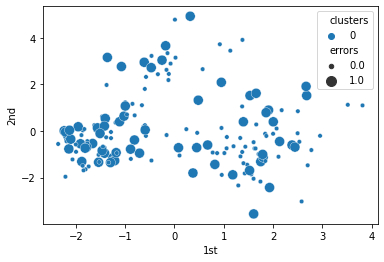

In [52]:
plot_clusters(full_dataset, x_axis='1st', y_axis='2nd')

In [64]:
import os
path = r'..\\Preprocessed_datasets\\'
full_dataset.to_csv(os.path.join(path, r'pca1_german_credit.csv'))

In [ ]:
pca.join()

In [ ]:
reduced_data = initialize_dataset(raw_data)

#pca features
to_reduce = reduced_data.drop(['scaled_errors', 'predicted_class', 'true_class', 'errors', 'clusters', 'new_clusters'], axis=1).columns
pca_features = PCA(n_components=2).fit_transform(reduced_data[to_reduce])

# other features (errors, true predictions)
non_reduced = pd.DataFrame()
non_reduced = reduced_data[['scaled_errors', 'predicted_class', 'true_class', 'errors', 'clusters', 'new_clusters']]

# merging pca'd features with other features
reduced = pd.DataFrame(pca_features)
reduced = reduced.merge(non_reduced, left_index = True, right_index = True)

# final dataset to work with 
reduced.head()

(array([[0.],
        [0.]]),
 array([[ True,  True],
        [False, False],
        [False, False]]),
 array([[False],
        [ True],
        [False]]))